In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-02-17 22:00:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  28.5MB/s    in 4.5s    

2024-02-17 22:00:29 (23.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


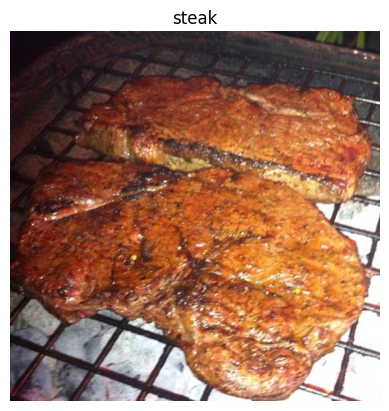

In [ ]:
# View a random image from the training dataset
import os
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (384, 512, 3)


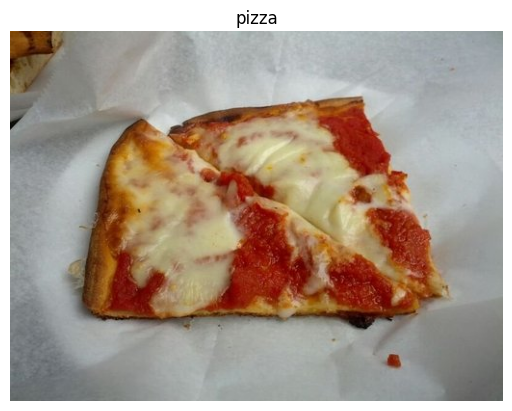

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu" , input_shape =(224 , 224 ,3)),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu" , input_shape =(224 , 224 ,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu" , input_shape =(224 , 224 ,3)),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu" , input_shape =(224 , 224 ,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 157ms/step - loss: 0.5801 - accuracy: 0.6840 - val_loss: 0.4275 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4434 - accuracy: 0.7860 - val_loss: 0.4212 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4003 - accuracy: 0.8307 - val_loss: 0.3437 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3609 - accuracy: 0.8540 - val_loss: 0.3503 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.3072 - accuracy: 0.8713 - val_loss: 0.3634 - val_accuracy: 0.8500


In [ ]:
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , Activation
from keras.optimizers import Adam
from keras import Sequential

In [ ]:
model_2 = Sequential([
    Conv2D(32 , 3 , activation = "relu"),
    Conv2D(32 , 3 , activation = "relu"),
    MaxPool2D(2),
    Conv2D(32 , 3 , activation = "relu"),
    Conv2D(32 , 3 , activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1 , activation = "sigmoid")


])

In [ ]:
model_2.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 221ms/step - loss: 0.5856 - accuracy: 0.7000 - val_loss: 0.4658 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4400 - accuracy: 0.8047 - val_loss: 0.3747 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 7s 138ms/step - loss: 0.4099 - accuracy: 0.8133 - val_loss: 0.3953 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3867 - accuracy: 0.8420 - val_loss: 0.3354 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3450 - accuracy: 0.8567 - val_loss: 0.3321 - val_accuracy: 0.8500


In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis


In [ ]:
augmented_train = train_datagen_augmented.flow_from_directory(train_dir,
                                                              batch_size = 32,
                                                              target_size = (224 , 224 ),
                                                              class_mode = "binary",
                                                              shuffle= True
                                                              )

Found 1500 images belonging to 2 classes.


In [ ]:
from keras.models import clone_model

In [ ]:
model_3 = clone_model(model_1)

model_3.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
history3 = model_3.fit(augmented_train ,
                       epochs= 5 ,
                       steps_per_epoch = len(augmented_train),
                       validation_data= valid_data,
                       validation_steps = len(valid_data) )

Epoch 1/5
47/47 [==============================] - 34s 700ms/step - loss: 0.6224 - accuracy: 0.6400 - val_loss: 0.4403 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 32s 645ms/step - loss: 0.4883 - accuracy: 0.7680 - val_loss: 0.3381 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 21s 450ms/step - loss: 0.4768 - accuracy: 0.7787 - val_loss: 0.3564 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 20s 432ms/step - loss: 0.4575 - accuracy: 0.7840 - val_loss: 0.3412 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 22s 470ms/step - loss: 0.4339 - accuracy: 0.7987 - val_loss: 0.3717 - val_accuracy: 0.8360


In [ ]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

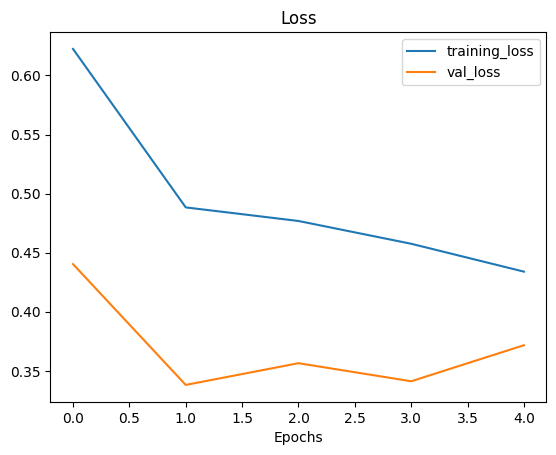

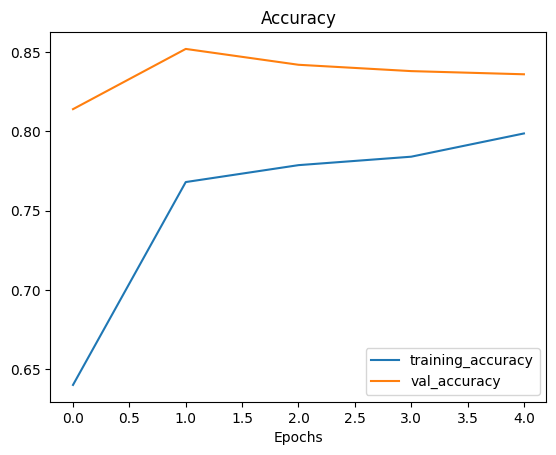

In [ ]:
plot_loss_curves(history3)

--2024-02-17 22:05:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  9.06MB/s    in 0.2s    

2024-02-17 22:05:18 (9.06 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



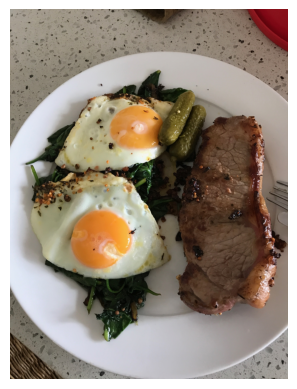

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 313ms/step


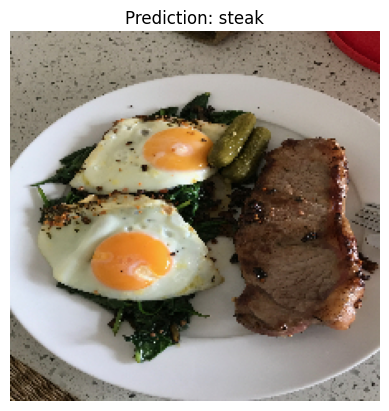

In [ ]:
# Test our model on a custom image
pred_and_plot(model_3, "03-steak.jpeg", class_names)

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


--2024-02-17 22:05:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  11.7MB/s    in 0.2s    

2024-02-17 22:05:22 (11.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 18ms/step


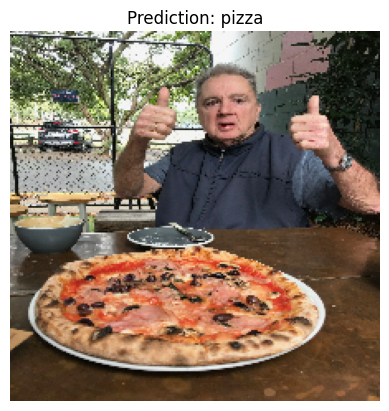

In [ ]:
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


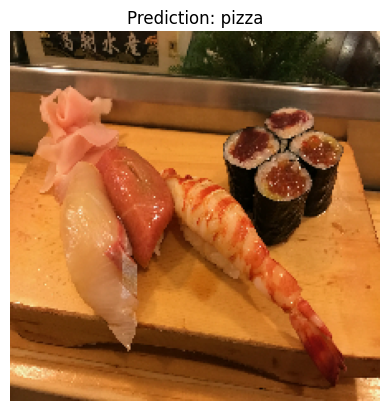

In [ ]:
pred_and_plot(model_3, "/content/03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


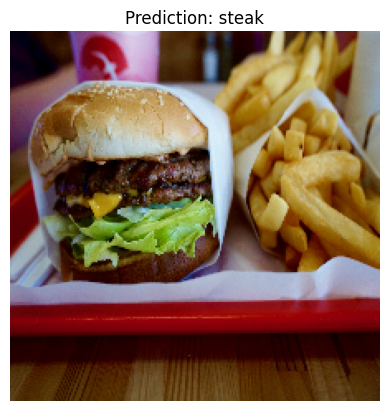

In [ ]:
pred_and_plot(model_3, "/content/03-hamburger.jpeg", class_names)

1/1 [==============================] - 0s 18ms/step


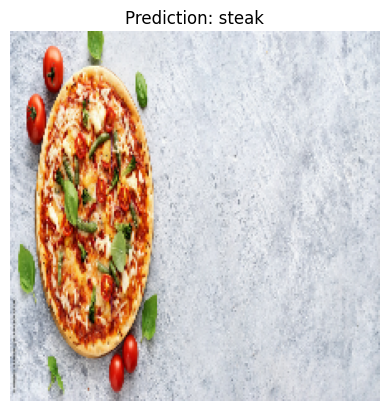

In [ ]:
pred_and_plot(model_3, "/content/1000_F_295651518_jKLHaxZ6vFsArpQxc5Pm0sL0ybrZKgru.jpg", class_names)

1/1 [==============================] - 0s 18ms/step


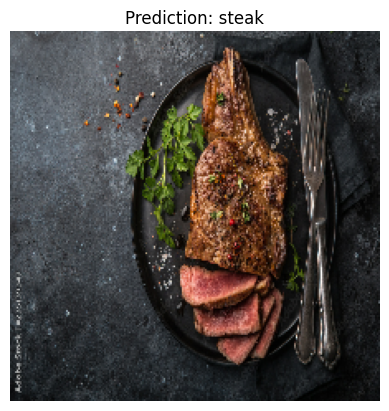

In [ ]:
pred_and_plot(model_3, "/content/1000_F_235139347_p5zIyK0h6APlXspCIXsTW5GpmJhMnHcT.jpg", class_names)

In [ ]:
model_3.save("binary_classification_computer_vision")